# **Import CSV file(Dataset) to Google Colab from Github**

In [1]:
url = 'https://raw.githubusercontent.com/tiansien/GA2/main/dataR2.csv'

# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# **Load the data**

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

In [6]:
df.tail()

Age    BMI  Glucose  Insulin      HOMA  Leptin  Adiponectin  Resistin  \
111   45  26.85       92     3.33  0.755688   54.68        12.10     10.96   
112   62  26.84      100     4.53  1.117400   12.45        21.42      7.32   
113   65  32.05       97     5.73  1.370998   61.48        22.54     10.33   
114   72  25.59       82     2.82  0.570392   24.96        33.75      3.27   
115   86  27.18      138    19.91  6.777364   90.28        14.11      4.35   

      MCP.1  Classification  
111  268.23               2  
112  330.16               2  
113  314.05               2  
114  392.46               2  
115   90.09               2

In [7]:
df.shape

(116, 10)

In [8]:
df.describe().T
# T is for transpose

count        mean         std        min         25%  \
Age             116.0   57.301724   16.112766  24.000000   45.000000   
BMI             116.0   27.582111    5.020136  18.370000   22.973205   
Glucose         116.0   97.793103   22.525162  60.000000   85.750000   
Insulin         116.0   10.012086   10.067768   2.432000    4.359250   
HOMA            116.0    2.694988    3.642043   0.467409    0.917966   
Leptin          116.0   26.615080   19.183294   4.311000   12.313675   
Adiponectin     116.0   10.180874    6.843341   1.656020    5.474283   
Resistin        116.0   14.725966   12.390646   3.210000    6.881763   
MCP.1           116.0  534.647000  345.912663  45.843000  269.978250   
Classification  116.0    1.551724    0.499475   1.000000    1.000000   

                       50%         75%          max  
Age              56.000000   71.000000    89.000000  
BMI              27.662416   31.241442    38.578759  
Glucose          92.000000  102.000000   201.000000  
Insulin           5.924500   11.189250    58.460000  
HOMA              1.380939    2.857787    25.050342  
Leptin           20.271000   37.378300    90.280000  
Adiponectin       8.352692   11.815970    38.040000  
Resistin         10.827740   17.755207    82.100000  
MCP.1           471.322500  700.085000  1698.440000  
Classification    2.000000    2.000000     2.000000

In [9]:
df.Classification.unique()
# to know how many unique value inside the data
# we realize got two only which is 1 breast cancer & 2 non breast cancer

array([1, 2], dtype=int64)

In [10]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

<AxesSubplot:xlabel='Classification', ylabel='count'>

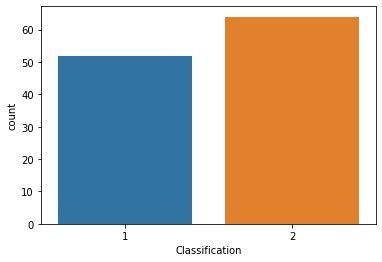

In [11]:
sns.countplot(data=df, x='Classification')

# **EDA**

Change the Classification Status

In [12]:
# Change the status
df['Classification'] = df.Classification.map({1:0, 2:1})
df

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               0  
1     4.06405  468.786               0  
2     9.27715  554.697               0  
3    12.76600  928.220               0  
4    10.57635  773.920               0  
..        ...      ...             ...  
111  10.96000  268.230               1  
112   7.32000  330.160               1  
113  10.33000  314.050               1  
114   3.27000  392.460               1  
115   4.35000   90.090               1  

[116 rows x 10 columns]

Statistical Summary

In [13]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

Checking for the missing data

In [14]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

# **Clean and prepare the data**

In [15]:
df.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               0  
1  468.786               0  
2  554.697               0  
3  928.220               0  
4  773.920               0

In [16]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [17]:
df.corr()
# important to check there're two reletion between

Age       BMI   Glucose   Insulin      HOMA    Leptin  \
Age             1.000000  0.008530  0.230106  0.032495  0.127033  0.102626   
BMI             0.008530  1.000000  0.138845  0.145295  0.114480  0.569593   
Glucose         0.230106  0.138845  1.000000  0.504653  0.696212  0.305080   
Insulin         0.032495  0.145295  0.504653  1.000000  0.932198  0.301462   
HOMA            0.127033  0.114480  0.696212  0.932198  1.000000  0.327210   
Leptin          0.102626  0.569593  0.305080  0.301462  0.327210  1.000000   
Adiponectin    -0.219813 -0.302735 -0.122121 -0.031296 -0.056337 -0.095389   
Resistin        0.002742  0.195350  0.291327  0.146731  0.231101  0.256234   
MCP.1           0.013462  0.224038  0.264879  0.174356  0.259529  0.014009   
Classification -0.043555 -0.132586  0.384315  0.276804  0.284012 -0.001078   

                Adiponectin  Resistin     MCP.1  Classification  
Age               -0.219813  0.002742  0.013462       -0.043555  
BMI               -0.302735  0.195350  0.224038       -0.132586  
Glucose           -0.122121  0.291327  0.264879        0.384315  
Insulin           -0.031296  0.146731  0.174356        0.276804  
HOMA              -0.056337  0.231101  0.259529        0.284012  
Leptin            -0.095389  0.256234  0.014009       -0.001078  
Adiponectin        1.000000 -0.252363 -0.200694       -0.019490  
Resistin          -0.252363  1.000000  0.366474        0.227310  
MCP.1             -0.200694  0.366474  1.000000        0.091381  
Classification    -0.019490  0.227310  0.091381        1.000000

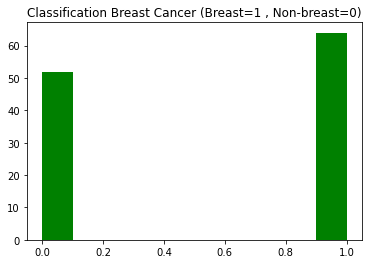

In [18]:
plt.hist(df['Classification'], color='g')
plt.title('Classification Breast Cancer (Breast=1 , Non-breast=0)')
plt.show()

<AxesSubplot:>

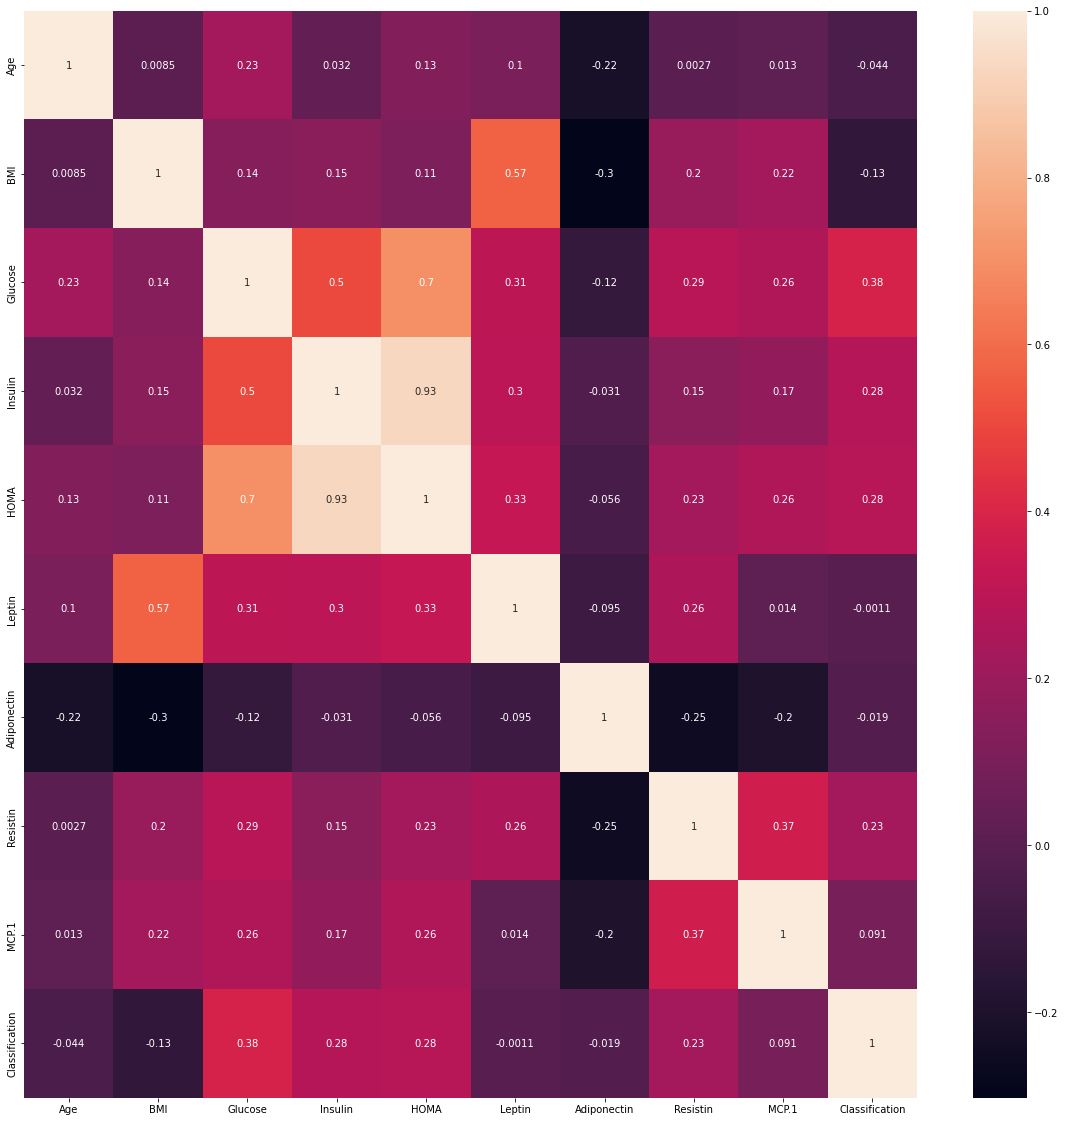

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [20]:
#check
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


In [21]:
colu=['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

for a in range(len(colu)):
    print("Is there any negative value in '{}' column  : {} ".format(colu[a],(df[colu[a]]<0).any()))

Is there any negative value in 'Age' column  : False 
Is there any negative value in 'BMI' column  : False 
Is there any negative value in 'Glucose' column  : False 
Is there any negative value in 'Insulin' column  : False 
Is there any negative value in 'HOMA' column  : False 
Is there any negative value in 'Leptin' column  : False 
Is there any negative value in 'Adiponectin' column  : False 
Is there any negative value in 'Resistin' column  : False 
Is there any negative value in 'MCP.1' column  : False 


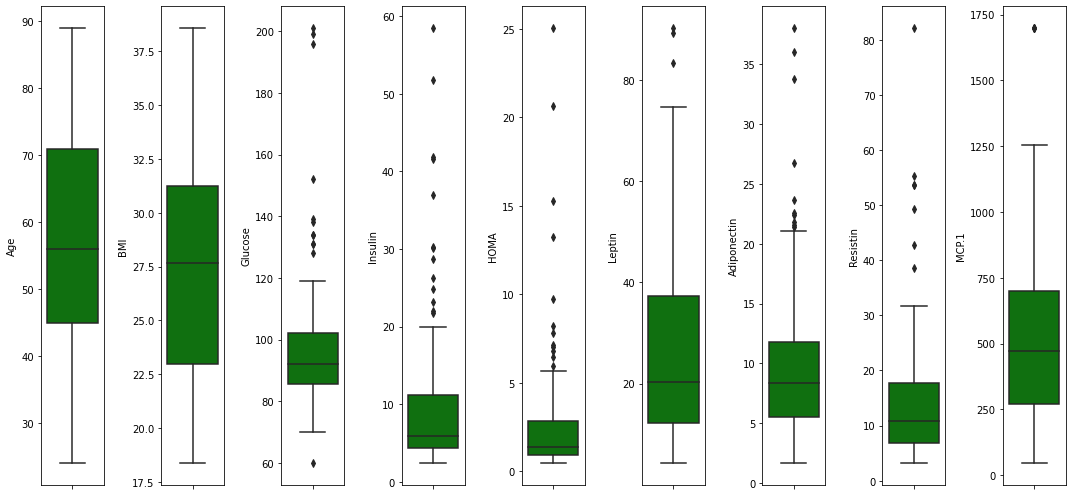

In [22]:
# checking the outliner
featuresNum = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

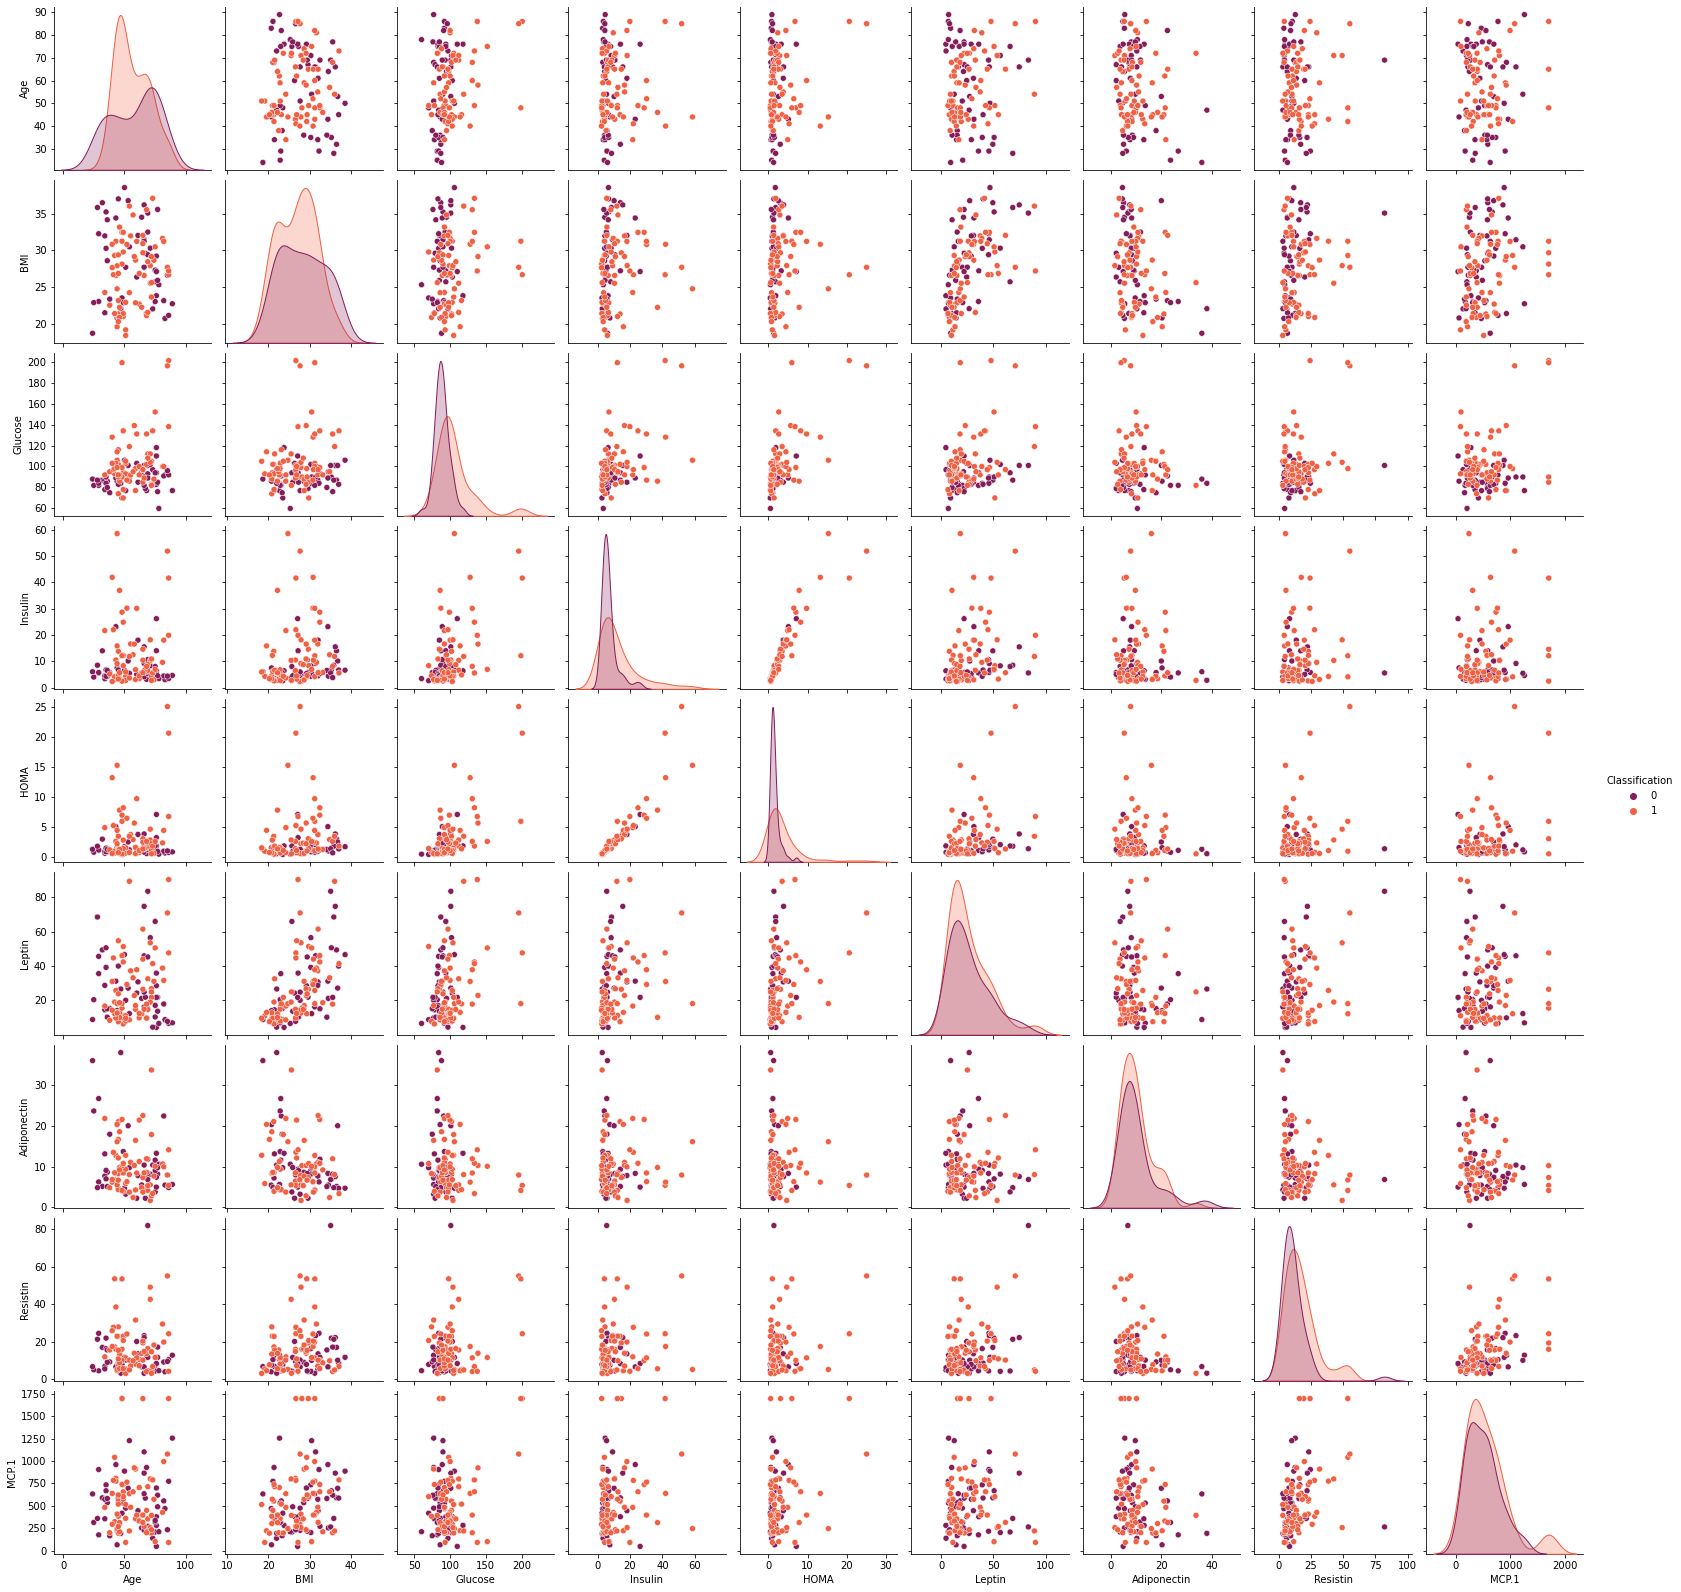

In [23]:
# generate a scatter plot matrix with the "mean" columns
cols = ['Age',
        'BMI', 
        'Glucose', 
        'Insulin', 
        'HOMA', 
        'Leptin', 
        'Adiponectin', 
        'Resistin',
        'MCP.1', 
        'Classification']

sns.pairplot(data=df[cols], hue='Classification', palette='rocket')

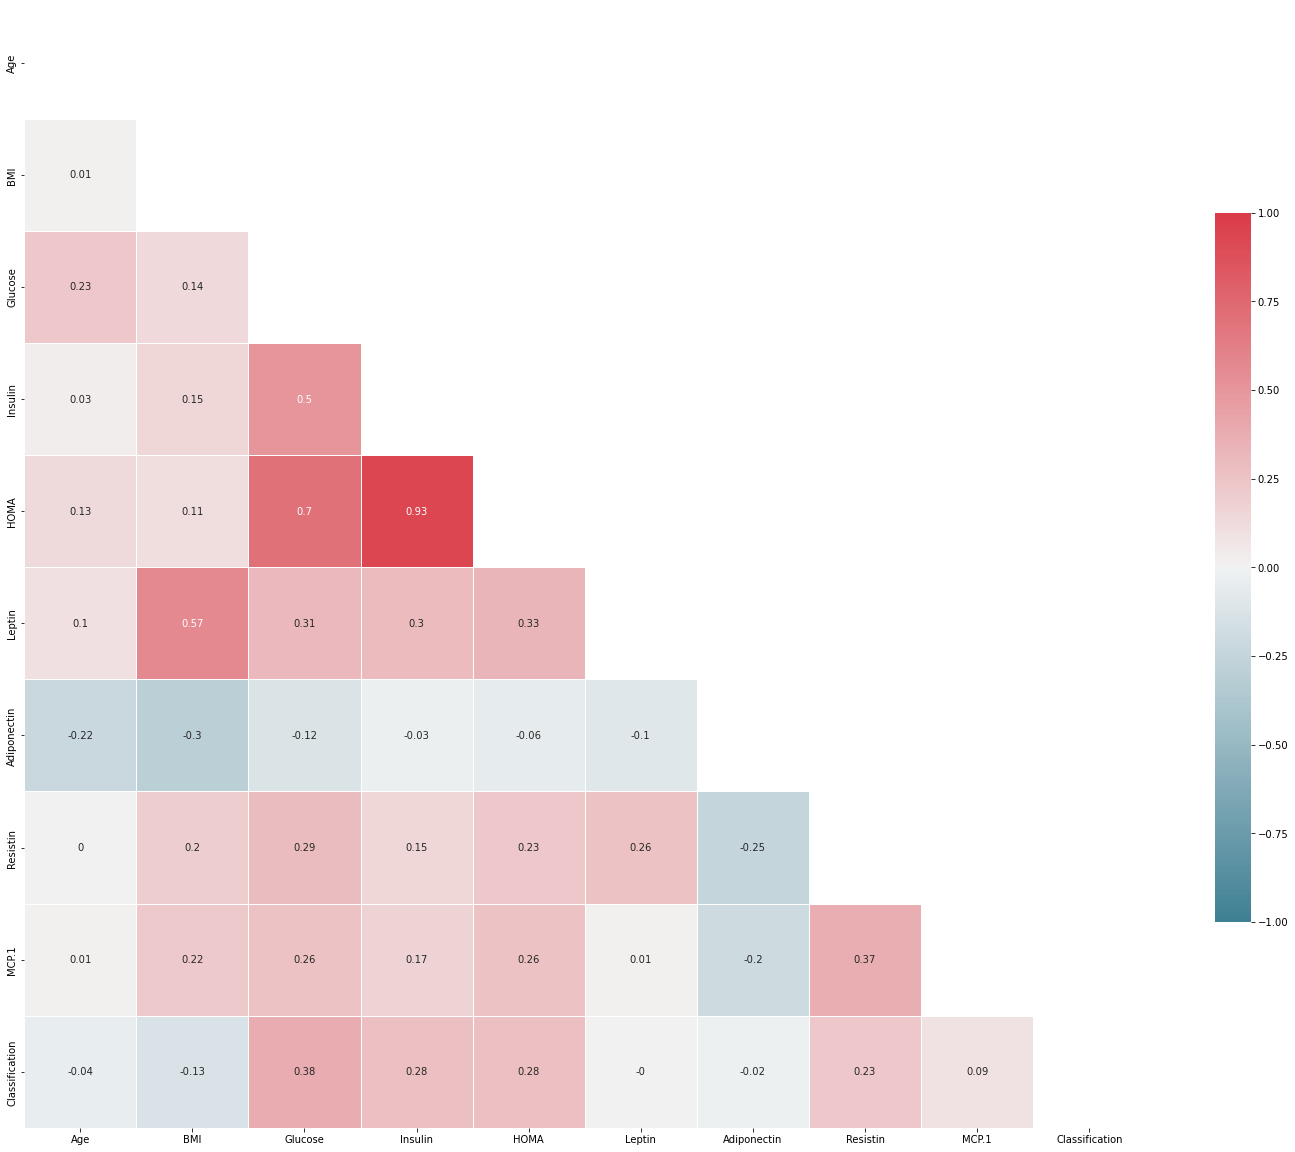

In [24]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Scatter plot

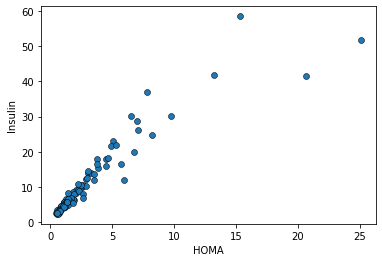

In [25]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['HOMA'], y=df['Insulin'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="HOMA", ylabel="Insulin")

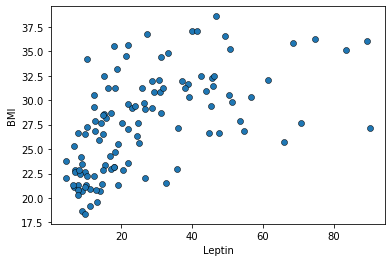

In [26]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['Leptin'], y=df['BMI'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Leptin", ylabel="BMI")

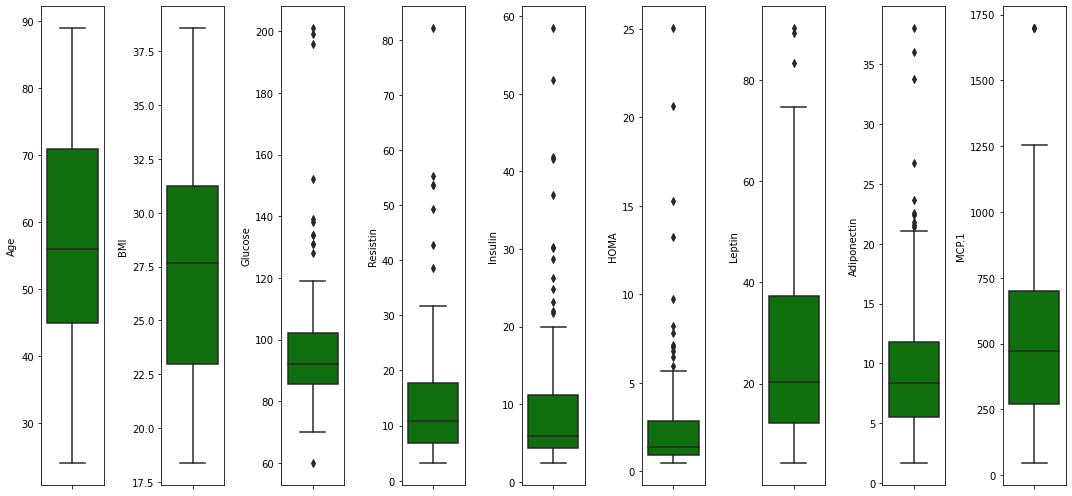

In [27]:
featuresNum = ['Age', 'BMI', 'Glucose', 'Resistin', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'MCP.1']
plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=df[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

How many patients have the breast cancer?

No handles with labels found to put in legend.


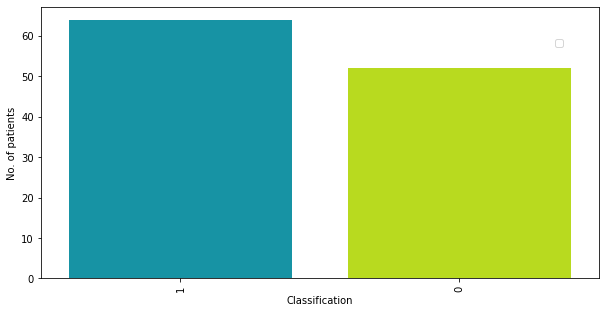

In [28]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="Classification", data=df, palette="nipy_spectral",
              order=df.Classification.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Classification", ylabel="No. of patients")
plt.legend(bbox_to_anchor=(0.945, 0.90))

Which Age related to Patients or Healty Control Health?

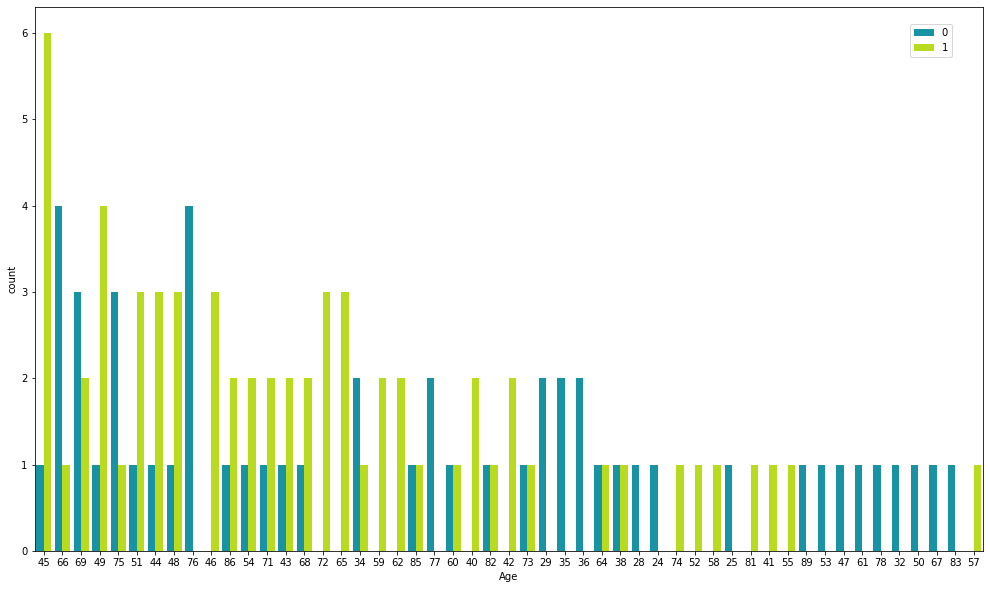

In [29]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="Age", hue="Classification", data=df, palette="nipy_spectral",
              order=df.Age.value_counts().index)
plt.legend(bbox_to_anchor=(0.945, 0.90))


Breast Cancer Patients Corresponding to Age

In [30]:
import plotly.express as px

fig = px.histogram(df, x="Age",color="Classification",
                   marginal="box",
                   hover_data=df.columns,
                  color_discrete_sequence=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Age"
)
fig.show()

Breast Cancer Patients corresponding to Glucose

In [31]:
import plotly.figure_factory as ff

more = df[df['Classification']==1]['Glucose']
less = df[df['Classification']==0]['Glucose']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Glucose",
    xaxis_title="Glucose",
)
fig.show()

In [32]:
more = df[df['Classification']==1]['Glucose']
less = df[df['Classification']==0]['Glucose']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , bin_size=5,
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Glucose",
    xaxis_title="Glucose",
)
fig.show()

Breast Cancer Patients corresponding to Resistin

In [33]:
more = df[df['Classification']==1]['Resistin']
less = df[df['Classification']==0]['Resistin']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Resistin",
    xaxis_title="Resistin",
)
fig.show()

In [34]:
more = df[df['Classification']==1]['Resistin']
less = df[df['Classification']==0]['Resistin']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , bin_size=5,
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Resistin",
    xaxis_title="Resistin",
)
fig.show()

Breast Cancer Patients corresponding to BMI

In [35]:
more = df[df['Classification']==1]['BMI']
less = df[df['Classification']==0]['BMI']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to BMI",
    xaxis_title="BMI",
)
fig.show()

In [36]:
more = df[df['Classification']==1]['BMI']
less = df[df['Classification']==0]['BMI']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , bin_size=5,
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to BMI",
    xaxis_title="BMI",
)
fig.show()

Breast Cancer Patients corresponding to Insulin

In [37]:
more = df[df['Classification']==1]['Insulin']
less = df[df['Classification']==0]['Insulin']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Insulin",
    xaxis_title="Insulin",
)
fig.show()

Breast Cancer Patients corresponding to HOMA

In [38]:
more = df[df['Classification']==1]['HOMA']
less = df[df['Classification']==0]['HOMA']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to HOMA",
    xaxis_title="HOMA",
)
fig.show()

Breast Cancer Patients corresponding to Leptin

In [39]:
more = df[df['Classification']==1]['Leptin']
less = df[df['Classification']==0]['Leptin']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Leptin",
    xaxis_title="Leptin",
)
fig.show()

Breast Cancer Patients corresponding to Adiponectin

In [40]:
more = df[df['Classification']==1]['Adiponectin']
less = df[df['Classification']==0]['Adiponectin']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to Adiponectin",
    xaxis_title="Adiponectin",
)
fig.show()

Breast Cancer Patients corresponding to MCP.1

In [41]:
more = df[df['Classification']==1]['MCP.1']
less = df[df['Classification']==0]['MCP.1']
fig = ff.create_distplot([less, more],['Healty Control', 'Breast Cancer Patients']
                         , show_hist=False, 
                        colors=['#bbeb44','#1db1cf'])
fig.update_layout(
    title="Breast Cancer Patients Corresponding to MCP.1",
    xaxis_title="MCP.1",
)
fig.show()

In [42]:
df["Glucose"] = np.log(df["Glucose"])
df["Insulin"] = np.log(df["Insulin"])
df["HOMA"] = np.log(df["HOMA"])
df["Leptin"] = np.log(df["Leptin"])
df["Adiponectin"] = np.log(df["Adiponectin"])
df["Resistin"] = np.log(df["Resistin"])
df["MCP.1"] = np.log(df["MCP.1"])

Drop unused column for modelling

In [43]:
df = df.drop(['Insulin'],axis=1)
df = df.drop(['MCP.1'],axis=1)
df = df.drop(['Adiponectin'],axis=1)
df = df.drop(['Leptin'],axis=1)
df = df.drop(['HOMA'],axis=1)

# **Building Model**

In [44]:
# We need to separate it first before train the data
X = df.drop(['Classification'],axis=1)
y= df['Classification']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

# **Feature Scaling**

In [47]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [48]:
# # Scaling the data
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X =  sc.fit_transform(X)
# X

# **Models and finding out the Best one**

**Logistic Regression**

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[13,  4],
       [ 4, 14]], dtype=int64)

<AxesSubplot:>

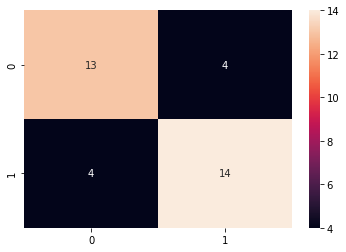

In [51]:
sns.heatmap(cm,annot=True)

In [52]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.7714285714285715


In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test,prediction1)

0.7714285714285715

**Decision Tree**

In [55]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [56]:
from sklearn.metrics import accuracy_score

# Training performance
train_predictions = model2.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Test/Validation performance
test_predictions = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", test_accuracy)


Training Accuracy:  1.0
Validation Accuracy:  0.8285714285714286


In [57]:
cm2

array([[14,  3],
       [ 3, 15]], dtype=int64)

In [58]:
accuracy_score(y_test,prediction2)

0.8285714285714286

**Random Forest**

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[12,  5],
       [ 3, 15]], dtype=int64)

In [60]:
accuracy_score(y_test, prediction3)

0.7714285714285715

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        17
           1       0.75      0.83      0.79        18

    accuracy                           0.77        35
   macro avg       0.78      0.77      0.77        35
weighted avg       0.77      0.77      0.77        35



In [62]:
from sklearn.metrics import accuracy_score

# Training predictions
train_prediction = model3.predict(X_train)

# Training accuracy
train_accuracy = accuracy_score(y_train, train_prediction)
print("Training Accuracy: ", train_accuracy)

# Validation/Test accuracy
validation_accuracy = accuracy_score(y_test, prediction3)
print("Validation Accuracy: ", validation_accuracy)


Training Accuracy:  1.0
Validation Accuracy:  0.7714285714285715


In [63]:
print(classification_report(y_test, prediction1))

print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.78      0.78      0.78        18

    accuracy                           0.77        35
   macro avg       0.77      0.77      0.77        35
weighted avg       0.77      0.77      0.77        35

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.83      0.83      0.83        18

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



**K Nearest Neighbor (K NN) Support Vector Machine Naive Bayes**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [65]:
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [67]:
# evaluate each model

results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10, shuffle=True, random_state=40)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN:, 0.754167, (0.155289)
NB:, 0.727778, (0.135401)
SVM:, 0.815278, (0.099391)


In [68]:
# make predictions on validation datasets

SVM = SVC()
SVM.fit(X_train, y_train)
predictions= SVM.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.8
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.82      0.78      0.80        18

    accuracy                           0.80        35
   macro avg       0.80      0.80      0.80        35
weighted avg       0.80      0.80      0.80        35

[[14  3]
 [ 4 14]]


In [69]:
from sklearn.metrics import accuracy_score

# Training performance
train_predictions = SVM.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Test/Validation performance
test_predictions = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", test_accuracy)


Training Accuracy:  0.9135802469135802
Validation Accuracy:  0.8285714285714286


SVM

Training Accuracy : 1.0
Testing Accuracy : 0.8285714285714286


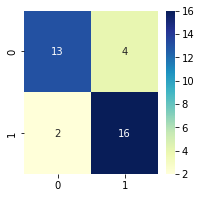

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.80      0.89      0.84        18

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35

------------------------------------------
ROC AUC Curves  :  0.8267973856209149
Sensitivity :  0.7647058823529411
Specificity :  0.8888888888888888


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print("Training Accuracy :", rf.score(X_train, y_train))
print("Testing Accuracy :", rf.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)

print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC AUC Curves  : ",roc_auc)

sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

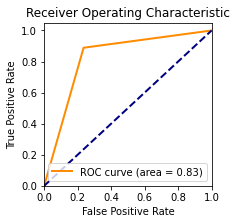

In [71]:
# Plot ROC curve
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [72]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [73]:
import tensorflow as tf

In [74]:
x_train = tf.constant(X_train)
y_train = tf.constant(y_train)
x_test = tf.constant(X_test)
y_test = tf.constant(y_test)
x_train.shape, y_train.shape

(TensorShape([81, 4]), TensorShape([81]))

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)), # (81, 4)
    tf.keras.layers.Dense(128, activation="relu"), # W . x + b
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.metrics.Accuracy(), tf.metrics.AUC(), tf.metrics.Precision()]
)

history = model.fit(
    x_train, 
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/100
2/2 [==============================] - 1s 233ms/step - loss: 0.6953 - accuracy: 0.0000e+00 - auc: 0.4224 - precision: 0.5538 - val_loss: 0.6593 - val_accuracy: 0.0000e+00 - val_auc: 0.6944 - val_precision: 0.6154
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 0.6416 - accuracy: 0.0000e+00 - auc: 0.7901 - precision: 0.7000 - val_loss: 0.6275 - val_accuracy: 0.0000e+00 - val_auc: 0.7990 - val_precision: 0.6538
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 0.6113 - accuracy: 0.0000e+00 - auc: 0.8382 - precision: 0.7000 - val_loss: 0.5992 - val_accuracy: 0.0000e+00 - val_auc: 0.8333 - val_precision: 0.6800
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.5804 - accuracy: 0.0000e+00 - auc: 0.8503 - precision: 0.7368 - val_loss: 0.5716 - val_accuracy: 0.0000e+00 - val_auc: 0.8595 - val_precision: 0.7500
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 0.5533 - accuracy: 0.0000e+00 -

2/2 [==============================] - 0s 26ms/step - loss: 0.3010 - accuracy: 0.0000e+00 - auc: 0.9528 - precision: 0.8889 - val_loss: 0.4545 - val_accuracy: 0.0000e+00 - val_auc: 0.8824 - val_precision: 0.8750
Epoch 38/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2966 - accuracy: 0.0000e+00 - auc: 0.9565 - precision: 0.9091 - val_loss: 0.4599 - val_accuracy: 0.0000e+00 - val_auc: 0.8824 - val_precision: 0.8235
Epoch 39/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2935 - accuracy: 0.0000e+00 - auc: 0.9565 - precision: 0.9091 - val_loss: 0.4648 - val_accuracy: 0.0000e+00 - val_auc: 0.8775 - val_precision: 0.8235
Epoch 40/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2900 - accuracy: 0.0000e+00 - auc: 0.9556 - precision: 0.9302 - val_loss: 0.4667 - val_accuracy: 0.0000e+00 - val_auc: 0.8775 - val_precision: 0.8235
Epoch 41/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2863 - accuracy: 0.0000e+00 - auc: 0.9

2/2 [==============================] - 0s 31ms/step - loss: 0.1864 - accuracy: 0.0000e+00 - auc: 0.9885 - precision: 0.9556 - val_loss: 0.5429 - val_accuracy: 0.0000e+00 - val_auc: 0.8611 - val_precision: 0.8000
Epoch 74/100
2/2 [==============================] - 0s 30ms/step - loss: 0.1848 - accuracy: 0.0000e+00 - auc: 0.9882 - precision: 0.9556 - val_loss: 0.5469 - val_accuracy: 0.0000e+00 - val_auc: 0.8627 - val_precision: 0.8000
Epoch 75/100
2/2 [==============================] - 0s 28ms/step - loss: 0.1821 - accuracy: 0.0000e+00 - auc: 0.9885 - precision: 0.9556 - val_loss: 0.5473 - val_accuracy: 0.0000e+00 - val_auc: 0.8595 - val_precision: 0.8000
Epoch 76/100
2/2 [==============================] - 0s 31ms/step - loss: 0.1772 - accuracy: 0.0000e+00 - auc: 0.9894 - precision: 0.9556 - val_loss: 0.5400 - val_accuracy: 0.0000e+00 - val_auc: 0.8627 - val_precision: 0.8000
Epoch 77/100
2/2 [==============================] - 0s 29ms/step - loss: 0.1737 - accuracy: 0.0000e+00 - auc: 0.9

In [76]:
aucname = [metrics for metrics in history.history.keys() if "auc" in metrics]
auc = history.history[aucname[0]]
val_auc = history.history[aucname[1]]

aucname, len(auc)

(['auc', 'val_auc'], 100)

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.BinaryAccuracy(), tf.metrics.AUC(), tf.metrics.Precision()]
)

history = model.fit(
    x_train, 
    y_train,
    epochs=60,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/60
2/2 [==============================] - 1s 191ms/step - loss: 0.6998 - binary_accuracy: 0.4938 - auc_1: 0.3829 - precision_1: 0.5342 - val_loss: 0.6561 - val_binary_accuracy: 0.6000 - val_auc_1: 0.7500 - val_precision_1: 0.5625
Epoch 2/60
2/2 [==============================] - 0s 26ms/step - loss: 0.6433 - binary_accuracy: 0.7284 - auc_1: 0.8028 - precision_1: 0.6818 - val_loss: 0.6198 - val_binary_accuracy: 0.7143 - val_auc_1: 0.8154 - val_precision_1: 0.6667
Epoch 3/60
2/2 [==============================] - 0s 25ms/step - loss: 0.6027 - binary_accuracy: 0.7654 - auc_1: 0.8634 - precision_1: 0.7368 - val_loss: 0.5914 - val_binary_accuracy: 0.7143 - val_auc_1: 0.8252 - val_precision_1: 0.6818
Epoch 4/60
2/2 [==============================] - 0s 27ms/step - loss: 0.5683 - binary_accuracy: 0.7901 - auc_1: 0.8702 - precision_1: 0.7736 - val_loss: 0.5666 - val_binary_accuracy: 0.7429 - val_auc_1: 0.8366 - val_precision_1: 0.7368
Epoch 5/60
2/2 [==============================] - 0

2/2 [==============================] - 0s 29ms/step - loss: 0.3012 - binary_accuracy: 0.8765 - auc_1: 0.9497 - precision_1: 0.9286 - val_loss: 0.4514 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8791 - val_precision_1: 0.8750
Epoch 36/60
2/2 [==============================] - 0s 26ms/step - loss: 0.2955 - binary_accuracy: 0.8765 - auc_1: 0.9516 - precision_1: 0.9286 - val_loss: 0.4504 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8807 - val_precision_1: 0.8750
Epoch 37/60
2/2 [==============================] - 0s 28ms/step - loss: 0.2904 - binary_accuracy: 0.8765 - auc_1: 0.9525 - precision_1: 0.9286 - val_loss: 0.4492 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8840 - val_precision_1: 0.8750
Epoch 38/60
2/2 [==============================] - 0s 29ms/step - loss: 0.2868 - binary_accuracy: 0.8889 - auc_1: 0.9534 - precision_1: 0.9302 - val_loss: 0.4457 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8873 - val_precision_1: 0.8750
Epoch 39/60
2/2 [==============================] - 0s 27ms/s

In [78]:
# Get the final epoch's training accuracy
final_train_accuracy = history.history['binary_accuracy'][-1]
print(f'Final training accuracy: {final_train_accuracy * 100}%')

# Get the final epoch's validation accuracy
final_val_accuracy = history.history['val_binary_accuracy'][-1]
print(f'Final validation accuracy: {final_val_accuracy * 100}%')


Final training accuracy: 93.82715821266174%
Final validation accuracy: 82.85714387893677%


Epoch 1/100
2/2 [==============================] - 0s 48ms/step - loss: 0.2096 - binary_accuracy: 0.9383 - auc_1: 0.9848 - precision_1: 0.9767 - val_loss: 0.4902 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8725 - val_precision_1: 0.8000
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 0.2067 - binary_accuracy: 0.9383 - auc_1: 0.9857 - precision_1: 0.9767 - val_loss: 0.4892 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8725 - val_precision_1: 0.8000
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2039 - binary_accuracy: 0.9012 - auc_1: 0.9845 - precision_1: 0.9318 - val_loss: 0.4930 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8742 - val_precision_1: 0.8000
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.2002 - binary_accuracy: 0.9136 - auc_1: 0.9848 - precision_1: 0.9333 - val_loss: 0.5035 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8791 - val_precision_1: 0.8000
Epoch 5/100
2/2 [==============================]

2/2 [==============================] - 0s 25ms/step - loss: 0.1283 - binary_accuracy: 0.9630 - auc_1: 0.9957 - precision_1: 0.9778 - val_loss: 0.6366 - val_binary_accuracy: 0.8000 - val_auc_1: 0.8578 - val_precision_1: 0.7895
Epoch 36/100
2/2 [==============================] - 0s 25ms/step - loss: 0.1249 - binary_accuracy: 0.9630 - auc_1: 0.9957 - precision_1: 0.9778 - val_loss: 0.6390 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8611 - val_precision_1: 0.8000
Epoch 37/100
2/2 [==============================] - 0s 26ms/step - loss: 0.1203 - binary_accuracy: 0.9630 - auc_1: 0.9963 - precision_1: 0.9778 - val_loss: 0.6492 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8611 - val_precision_1: 0.8000
Epoch 38/100
2/2 [==============================] - 0s 26ms/step - loss: 0.1188 - binary_accuracy: 0.9630 - auc_1: 0.9963 - precision_1: 0.9778 - val_loss: 0.6605 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8627 - val_precision_1: 0.8000
Epoch 39/100
2/2 [==============================] - 0s 27

2/2 [==============================] - 0s 25ms/step - loss: 0.0758 - binary_accuracy: 0.9753 - auc_1: 0.9994 - precision_1: 0.9783 - val_loss: 0.8615 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8382 - val_precision_1: 0.8000
Epoch 70/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0746 - binary_accuracy: 0.9753 - auc_1: 0.9994 - precision_1: 0.9783 - val_loss: 0.8690 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8448 - val_precision_1: 0.8000
Epoch 71/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0729 - binary_accuracy: 0.9753 - auc_1: 0.9994 - precision_1: 0.9783 - val_loss: 0.8690 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8366 - val_precision_1: 0.8000
Epoch 72/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0710 - binary_accuracy: 0.9753 - auc_1: 0.9994 - precision_1: 0.9783 - val_loss: 0.8642 - val_binary_accuracy: 0.8286 - val_auc_1: 0.8382 - val_precision_1: 0.8000
Epoch 73/100
2/2 [==============================] - 0s 26

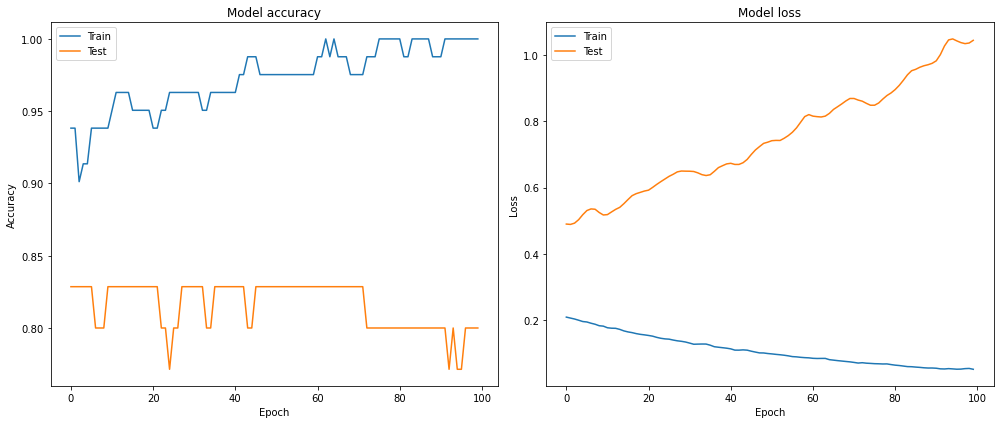

In [79]:
history = model.fit(
    x_train, 
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


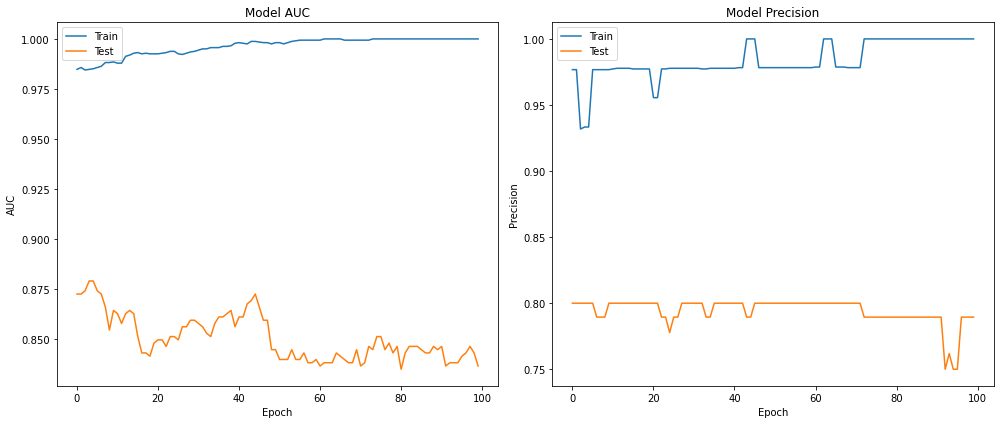

In [80]:
# Plot training & validation AUC values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation precision values
plt.subplot(1, 2, 2)
plt.plot(history.history['precision_1'])
plt.plot(history.history['val_precision_1'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


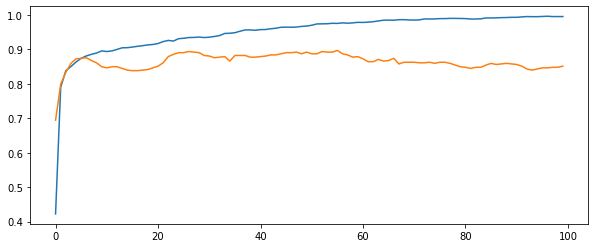

In [81]:
plt.figure(figsize=(10, 4))
plt.plot(auc)
plt.plot(val_auc)

In [82]:
# plt.figure(figsize=(10, 4))
# plt.plot(history.history['auc_6'])

In [83]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 1000us/step


In [84]:
auc = tf.metrics.AUC()
aucmetrics = auc(y_test, tf.squeeze(y_pred)).numpy()
aucmetrics

0.83660126

In [85]:
y_test.shape, tf.squeeze(y_pred).shape

(TensorShape([35]), TensorShape([35]))

In [86]:
model.save("model.h5")

In [87]:
def load(weights="model.h5"):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(4,)), # (81, 4)
        tf.keras.layers.Dense(128, activation="relu"), # W . x + b
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ])
    model.load_weights(weights)
    return model

In [88]:
model = load("model/model.h5")
predict = lambda x : int(model.predict([x]).squeeze().item())

In [89]:
pred = predict([48,	23.500000,	4.248495,	2.078923])
print(f"class: {pred}")

1/1 [==============================] - 0s 46ms/step
class: 0
